In [7]:
import pandas as pd
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np




df_gene = pd.read_csv('/mnt/data/macaulay/datas/gene_embeddings.csv')
df_gene.drop(columns=['Unnamed: 0'], inplace=True)
df_crispr = pd.read_csv('/mnt/data/macaulay/datas/CRISPRGeneEffect.csv').rename(columns={"ModelID": 'Cell_line'}).set_index('Cell_line')
df_crispr = df_crispr.fillna(df_crispr.mean())
df_crispr.reset_index(inplace=True)
cleaned_headers = [col.split(" ")[0] for col in df_crispr.columns]
df_crispr.columns = cleaned_headers

for j in range(len(df_gene)):
    df_sgene = df_gene.iloc[j:j+1]
    name = df_sgene.iloc[0,0]
    print(name)
    try:
         df_crispr1 = df_crispr[['Cell_line',name]]
         pass
    except KeyError:
        print(f'{name} not found in CRISPR data')
        continue

    
    #for i in range (1):
    df_omic = pd.read_csv(f'/mnt/data/macaulay/datas/OmicExpression_embeddings/OmicExpression_embeddings_3.csv')
    df_omic = df_omic[df_omic['Cell_line'].isin(df_crispr1['Cell_line'])]
    df_crispr2 = df_crispr1[df_crispr1['Cell_line'].isin(df_omic['Cell_line'])]
    df2_repeated = pd.concat([df_sgene]*df_omic.shape[0], ignore_index=True)
    df2_repeated = df2_repeated.iloc[:, 1:]
    # Concatenate df1 and repeated df2 along the horizontal axis
    result = pd.concat([df_omic, df2_repeated], axis=1)
    merged_df = pd.merge(result, df_crispr2, left_on='Cell_line', right_on='Cell_line', how='inner')

    X = merged_df.drop(columns=['Cell_line', name])
    y = merged_df[name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # randomized_columns_order = X_train.columns.to_list()
    # np.random.shuffle(randomized_columns_order)

    # X_train = X_train[randomized_columns_order]
    # X_test = X_test[randomized_columns_order]


    # Training an SVR model with default settings
    svr_model = SVR()
    svr_model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = svr_model.predict(X_test)

    # Calculating MSE for the predictions
    mse = mean_squared_error(y_test, y_pred)

    #calculate r2 score
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    #calculate pearson correlation
    from scipy.stats import pearsonr
    corr, _ = pearsonr(y_test, y_pred)
    
    print(f'{name}, MSE: {mse}, r2: {r2}, pearson correlation: {corr}')
    # with open('quick.txt', 'a') as f:
    #     if i == 0:
    #         f.write('index,MSE,r2,pearson correlation\n')
    #         f.write(f'{i},{mse},{r2},{corr}\n')
    #     else:
    #         f.write(f'{i},{mse},{r2},{corr}\n')
            



/tmp/ipykernel_3281490/1289276529.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_crispr.reset_index(inplace=True)


TSPAN6
TSPAN6, MSE: 0.012288929388492447, r2: -0.16143943731847865, pearson correlation: -0.03471554883304037
TNMD
TNMD, MSE: 0.0066559168183888155, r2: -0.12228376542875652, pearson correlation: 0.06768498527422201
DPM1
DPM1, MSE: 0.03735803870592456, r2: 0.014300009355616261, pearson correlation: 0.20720663014236534
SCYL3
SCYL3, MSE: 0.012069974794272846, r2: -0.10449379064581787, pearson correlation: 0.07357463818283312
FIRRM
FIRRM not found in CRISPR data
FGR
FGR, MSE: 0.017373403776217298, r2: -0.16694553007019852, pearson correlation: -0.014886891205020346
CFH
CFH, MSE: 0.016500019710610585, r2: -0.007024562567235382, pearson correlation: 0.1468905239820124
FUCA2
FUCA2, MSE: 0.009313312528983014, r2: -0.06667536477344171, pearson correlation: 0.013984091203061362
GCLC
GCLC, MSE: 0.03202832964490925, r2: 0.23982878263455454, pearson correlation: 0.489749948507392
NFYA
NFYA, MSE: 0.030955217785473926, r2: -0.108799874280469, pearson correlation: 0.005541850612664771
STPG1
STPG1, MS

KeyboardInterrupt: 

In [6]:
import pandas as pd
df = pd.read_csv('quick.txt')
df


,index,MSE,r2,pearson correlation
0,0,0.006474,-0.091663,-0.026891
1,10,0.006222,-0.049040,0.040341
2,20,0.005991,-0.010093,0.056023
3,30,0.005942,-0.001931,0.067804
4,40,0.005916,0.002440,0.082805
...,...,...,...,...
95,950,0.005961,-0.005035,0.123832
96,960,0.005961,-0.005143,0.090751
97,970,0.005962,-0.005198,0.051580
98,980,0.005962,-0.005318,0.013243


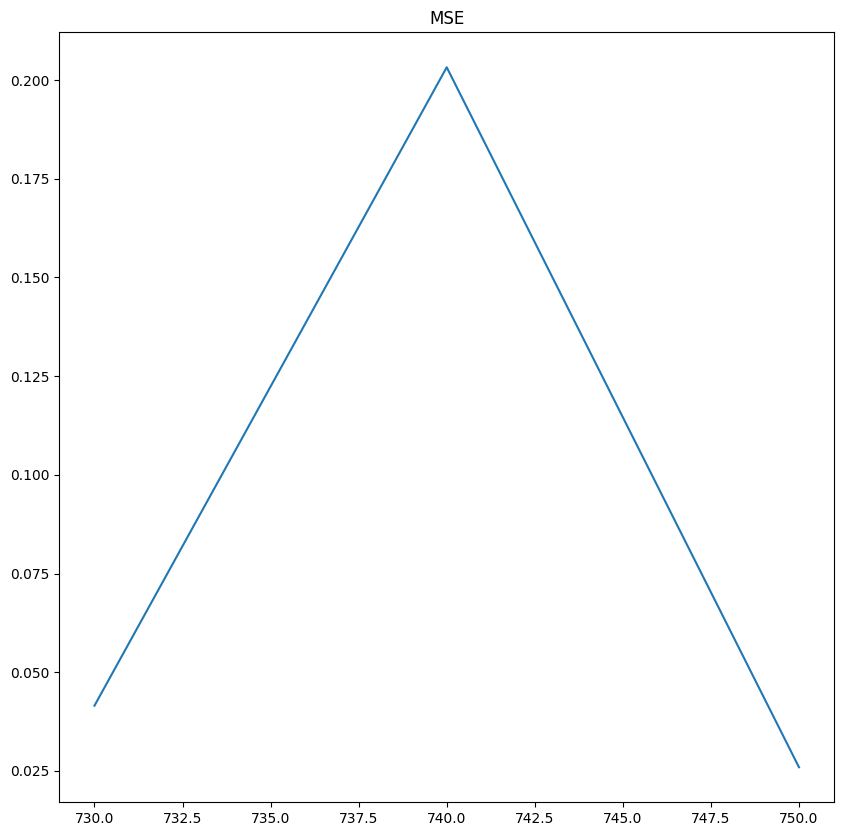

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title('MSE')
plt.plot(df['index'].iloc[73:76], df['pearson correlation'].iloc[73:76])
plt.show()

In [13]:
import pandas as pd
df_omic = pd.read_csv('/mnt/data/macaulay/datas/OmicExpression_embeddings/OmicExpression_embeddings_740.csv')
df_omic

,Cell_line,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACH-001289,0.000123,0.000029,-0.000235,-0.000031,-0.000066,0.000114,-1.508820e-04,0.000181,0.000199,...,-0.000146,-0.000126,0.000075,-0.000015,0.000156,0.000085,0.000016,-0.000261,-0.000116,-0.000029
1,ACH-001538,0.000102,0.000013,-0.000252,-0.000008,-0.000155,0.000123,-7.886469e-05,0.000135,0.000150,...,-0.000127,-0.000146,0.000046,-0.000006,0.000123,0.000051,0.000033,-0.000220,-0.000068,0.000005
2,ACH-000233,0.000497,0.000431,-0.000315,-0.000085,0.000296,-0.000022,-2.165796e-04,0.000296,0.000361,...,-0.000229,0.000303,-0.000265,-0.000205,0.000213,-0.000173,0.000158,-0.000146,0.000221,-0.000140
3,ACH-000461,0.000133,0.000027,-0.000222,-0.000048,-0.000073,0.000104,-1.279752e-04,0.000168,0.000196,...,-0.000154,-0.000120,0.000076,-0.000020,0.000157,0.000078,0.000019,-0.000261,-0.000115,-0.000021
4,ACH-001794,0.000133,0.000022,-0.000228,-0.000040,-0.000079,0.000086,-1.419078e-04,0.000164,0.000199,...,-0.000159,-0.000116,0.000107,-0.000017,0.000150,0.000059,0.000008,-0.000269,-0.000120,-0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,ACH-001128,0.000125,0.000040,0.000725,-0.000468,-0.000226,0.000952,-7.330102e-05,0.000595,0.000220,...,0.000157,-0.000462,0.000758,-0.000479,-0.000674,-0.000234,0.000220,0.000269,-0.000214,-0.000539
997,ACH-002669,-0.000040,0.000024,0.000791,-0.000492,-0.000191,0.001245,-6.764894e-07,0.000578,0.000268,...,0.000188,-0.000669,0.000481,-0.000427,-0.000694,-0.000158,0.000397,0.000421,-0.000324,-0.000329
998,ACH-001858,0.000021,-0.000069,0.000739,-0.000549,-0.000202,0.001007,-1.488847e-05,0.000520,0.000189,...,0.000088,-0.000474,0.000678,-0.000372,-0.000704,-0.000233,0.000270,0.000303,-0.000213,-0.000421
999,ACH-001997,-0.000049,0.000052,0.000789,-0.000543,-0.000215,0.001151,1.216831e-05,0.000554,0.000313,...,0.000194,-0.000685,0.000466,-0.000468,-0.000672,-0.000198,0.000392,0.000363,-0.000369,-0.000386


In [14]:
df_gene = pd.read_csv('/mnt/data/macaulay/datas/gene_embeddings.csv')
df_gene.drop(columns=['Unnamed: 0'], inplace=True)
df_gene

,Gene,0,1,2,3,4,5,6,7,8,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,TSPAN6,0.007388,-0.041370,0.096356,-0.013784,0.135280,0.096368,-0.075391,-0.071801,-0.005310,...,0.016200,0.008399,-0.117044,-0.024924,-0.090740,0.051494,0.259235,-0.290587,-0.082433,-0.005842
1,TNMD,0.002693,-0.107533,0.110958,-0.021181,0.022778,0.011800,-0.184711,-0.042250,-0.004474,...,0.077050,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
2,DPM1,-0.002555,0.036781,0.138810,-0.017648,-0.134064,-0.016296,-0.016667,0.017249,-0.004147,...,0.060394,0.002193,-0.076270,-0.012600,-0.082542,0.001728,-0.049980,0.046820,-0.025582,-0.074040
3,SCYL3,0.006960,-0.047992,0.046699,-0.008121,-0.069281,-0.005902,-0.162656,-0.031567,-0.004323,...,0.053726,0.015579,-0.040192,-0.027001,-0.050186,-0.033636,-0.001299,0.060555,0.125991,-0.007590
4,FIRRM,0.002039,-0.033172,0.055480,-0.011774,0.393842,-0.017665,0.114471,-0.006541,-0.004014,...,0.015848,0.035485,-0.107440,0.031029,-0.105847,-0.028390,0.144355,0.017495,-0.084676,-0.028152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,SPEGNB,0.009064,-0.197801,0.053679,-0.000020,-0.341644,-0.019103,-0.132918,0.035030,-0.005278,...,0.042185,0.050036,0.034468,0.020452,-0.119265,-0.027937,-0.120234,0.164765,0.059899,-0.056150
18931,H3C1,0.008824,-0.032068,0.031007,-0.010487,0.011797,0.019340,-0.134893,-0.032406,-0.010154,...,0.032144,0.062691,-0.092352,0.025610,-0.082274,-0.039286,0.121268,-0.005911,0.106644,0.029937
18932,H3C1,0.008824,-0.032068,0.031007,-0.010487,0.011797,0.019340,-0.134893,-0.032406,-0.010154,...,0.032144,0.062691,-0.092352,0.025610,-0.082274,-0.039286,0.121268,-0.005911,0.106644,0.029937
18933,SGK3,0.025867,-0.022947,0.030490,-0.011046,-0.092056,-0.031420,-0.101476,-0.149048,-0.004730,...,0.075434,0.016700,-0.029252,-0.033174,-0.209394,-0.030303,-0.059336,0.126105,0.073717,-0.023118


In [15]:
df_crispr = pd.read_csv('/mnt/data/macaulay/datas/CRISPRGeneEffect.csv').rename(columns={"ModelID": 'Cell_line'}).set_index('Cell_line')
df_crispr = df_crispr.fillna(df_crispr.mean())
df_crispr.reset_index(inplace=True)
cleaned_headers = [col.split(" ")[0] for col in df_crispr.columns]
df_crispr.columns = cleaned_headers
display(df_crispr.head()) 
df_crispr.shape

/tmp/ipykernel_3191775/3535965895.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_crispr.reset_index(inplace=True)


,Cell_line,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,ACH-000001,-0.102725,0.058595,0.058246,-0.041881,-0.088661,0.170335,-0.015254,-0.223691,0.218612,...,-0.084055,-0.084184,0.131495,0.238702,0.201712,-0.250381,0.045612,0.044154,0.146801,-0.473583
1,ACH-000004,0.008878,-0.077633,-0.099297,0.030120,-0.080334,-0.112404,0.298774,-0.125139,0.218675,...,-0.066673,-0.443145,0.183618,0.058936,0.108711,0.056322,-0.355712,0.135310,0.200408,-0.076150
2,ACH-000005,-0.117950,0.013989,0.164099,0.184570,-0.201766,-0.202198,0.207814,-0.089192,-0.082624,...,-0.151588,-0.402572,-0.073320,-0.114402,-0.009449,-0.198378,-0.135007,0.014708,-0.065341,-0.196296
3,ACH-000007,-0.049135,-0.089991,0.084994,0.129586,-0.041561,-0.014555,0.045143,-0.263324,-0.135143,...,-0.273444,-0.533265,-0.016257,0.222234,0.086937,-0.070598,-0.412361,-0.003722,-0.277756,-0.410805
4,ACH-000009,0.004969,-0.098170,0.092887,0.110913,0.028599,-0.087008,0.073032,-0.240147,0.072294,...,-0.212287,-0.326986,-0.037498,0.235983,-0.070229,-0.061208,-0.537773,0.084630,0.018678,-0.307176


(1095, 17932)

In [17]:
df_crispr = df_crispr[['Cell_line','TNMD']]
df_crispr

,Cell_line,TNMD
0,ACH-000001,0.100322
1,ACH-000004,0.188526
2,ACH-000005,0.168012
3,ACH-000007,0.106421
4,ACH-000009,0.124951
...,...,...
1090,ACH-002800,0.000227
1091,ACH-002834,0.014660
1092,ACH-002847,0.091893
1093,ACH-002922,0.107861


In [18]:
j = 1
df_sgene = df_gene.iloc[j:j+1]
df_sgene

,Gene,0,1,2,3,4,5,6,7,8,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
1,TNMD,0.002693,-0.107533,0.110958,-0.021181,0.022778,0.0118,-0.184711,-0.04225,-0.004474,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551


In [19]:
# Extracting matched rows from df_omic and df_crispr based on the 'Cell_line' and common columns(gene)
df_omic = df_omic[df_omic['Cell_line'].isin(df_crispr['Cell_line'])]
df_crispr = df_crispr[df_crispr['Cell_line'].isin(df_omic['Cell_line'])]

display(df_omic.head()), display(df_crispr.head())

df_omic.shape, df_crispr.shape

,Cell_line,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACH-001289,0.000123,0.000029,-0.000235,-0.000031,-0.000066,0.000114,-0.000151,0.000181,0.000199,...,-0.000146,-0.000126,0.000075,-0.000015,0.000156,0.000085,0.000016,-0.000261,-0.000116,-0.000029
1,ACH-001538,0.000102,0.000013,-0.000252,-0.000008,-0.000155,0.000123,-0.000079,0.000135,0.000150,...,-0.000127,-0.000146,0.000046,-0.000006,0.000123,0.000051,0.000033,-0.000220,-0.000068,0.000005
2,ACH-000233,0.000497,0.000431,-0.000315,-0.000085,0.000296,-0.000022,-0.000217,0.000296,0.000361,...,-0.000229,0.000303,-0.000265,-0.000205,0.000213,-0.000173,0.000158,-0.000146,0.000221,-0.000140
3,ACH-000461,0.000133,0.000027,-0.000222,-0.000048,-0.000073,0.000104,-0.000128,0.000168,0.000196,...,-0.000154,-0.000120,0.000076,-0.000020,0.000157,0.000078,0.000019,-0.000261,-0.000115,-0.000021
4,ACH-001794,0.000133,0.000022,-0.000228,-0.000040,-0.000079,0.000086,-0.000142,0.000164,0.000199,...,-0.000159,-0.000116,0.000107,-0.000017,0.000150,0.000059,0.000008,-0.000269,-0.000120,-0.000037


,Cell_line,TNMD
0,ACH-000001,0.100322
1,ACH-000004,0.188526
2,ACH-000005,0.168012
3,ACH-000007,0.106421
4,ACH-000009,0.124951


((1001, 1025), (1001, 2))

In [20]:
# Repeat df2 to match the number of rows in df1
df2_repeated = pd.concat([df_sgene]*df_omic.shape[0], ignore_index=True)
df2_repeated = df2_repeated.iloc[:, 1:]
# Concatenate df1 and repeated df2 along the horizontal axis
result = pd.concat([df_omic, df2_repeated], axis=1)

result

,Cell_line,0,1,2,3,4,5,6,7,8,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,ACH-001289,0.000123,0.000029,-0.000235,-0.000031,-0.000066,0.000114,-1.508820e-04,0.000181,0.000199,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
1,ACH-001538,0.000102,0.000013,-0.000252,-0.000008,-0.000155,0.000123,-7.886469e-05,0.000135,0.000150,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
2,ACH-000233,0.000497,0.000431,-0.000315,-0.000085,0.000296,-0.000022,-2.165796e-04,0.000296,0.000361,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
3,ACH-000461,0.000133,0.000027,-0.000222,-0.000048,-0.000073,0.000104,-1.279752e-04,0.000168,0.000196,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
4,ACH-001794,0.000133,0.000022,-0.000228,-0.000040,-0.000079,0.000086,-1.419078e-04,0.000164,0.000199,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,ACH-001128,0.000125,0.000040,0.000725,-0.000468,-0.000226,0.000952,-7.330102e-05,0.000595,0.000220,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
997,ACH-002669,-0.000040,0.000024,0.000791,-0.000492,-0.000191,0.001245,-6.764894e-07,0.000578,0.000268,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
998,ACH-001858,0.000021,-0.000069,0.000739,-0.000549,-0.000202,0.001007,-1.488847e-05,0.000520,0.000189,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551
999,ACH-001997,-0.000049,0.000052,0.000789,-0.000543,-0.000215,0.001151,1.216831e-05,0.000554,0.000313,...,0.07705,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551


In [21]:
# Merging the two dataframes based on the cell line 
merged_df = pd.merge(result, df_crispr, left_on='Cell_line', right_on='Cell_line', how='inner')
merged_df

,Cell_line,0,1,2,3,4,5,6,7,8,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,TNMD
0,ACH-001289,0.000123,0.000029,-0.000235,-0.000031,-0.000066,0.000114,-1.508820e-04,0.000181,0.000199,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.006342
1,ACH-001538,0.000102,0.000013,-0.000252,-0.000008,-0.000155,0.000123,-7.886469e-05,0.000135,0.000150,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.061051
2,ACH-000233,0.000497,0.000431,-0.000315,-0.000085,0.000296,-0.000022,-2.165796e-04,0.000296,0.000361,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.115036
3,ACH-000461,0.000133,0.000027,-0.000222,-0.000048,-0.000073,0.000104,-1.279752e-04,0.000168,0.000196,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.176118
4,ACH-001794,0.000133,0.000022,-0.000228,-0.000040,-0.000079,0.000086,-1.419078e-04,0.000164,0.000199,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.056389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,ACH-001128,0.000125,0.000040,0.000725,-0.000468,-0.000226,0.000952,-7.330102e-05,0.000595,0.000220,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.136577
997,ACH-002669,-0.000040,0.000024,0.000791,-0.000492,-0.000191,0.001245,-6.764894e-07,0.000578,0.000268,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.033543
998,ACH-001858,0.000021,-0.000069,0.000739,-0.000549,-0.000202,0.001007,-1.488847e-05,0.000520,0.000189,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.046338
999,ACH-001997,-0.000049,0.000052,0.000789,-0.000543,-0.000215,0.001151,1.216831e-05,0.000554,0.000313,...,0.105107,0.068415,0.012006,-0.119203,-0.004977,0.124842,-0.135702,0.010037,-0.042551,0.101912


In [167]:
#merged_df.to_csv('/mnt/data/macaulay/datas/single_gene/TSPAN6.csv')

In [30]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Splitting data into train and test sets
X = merged_df.drop(columns=['Cell_line', 'TNMD'])
y = merged_df['TNMD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# randomized_columns_order = X_train.columns.to_list()
# np.random.shuffle(randomized_columns_order)

# X_train = X_train[randomized_columns_order]
# X_test = X_test[randomized_columns_order]


# Training an SVR model with default settings
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = svr_model.predict(X_test)

# Calculating MSE for the predictions
mse = mean_squared_error(y_test, y_pred)

#calculate r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

#calculate pearson correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('R2 score: ', r2)
print('Pearsons correlation: %.3f' % corr)



MSE:  0.0059556993663745636
R2 score:  -0.0042169836302858865
Pearsons correlation: 0.203


In [31]:
y_test

521   0.07
941   0.07
741   0.03
980   0.40
411   0.11
      ... 
332   0.18
208   0.02
992   0.02
78    0.06
29    0.12
Name: TNMD, Length: 201, dtype: float64

In [32]:
y_pred

array([0.07289464, 0.07182723, 0.07285018, 0.07439371, 0.07285441,
       0.07291047, 0.07268556, 0.07289291, 0.07284395, 0.07282209,
       0.07280447, 0.0726888 , 0.07284822, 0.07286104, 0.07286427,
       0.07271375, 0.0728573 , 0.07280305, 0.07283564, 0.07287966,
       0.07286789, 0.07288584, 0.07290258, 0.07287485, 0.07290023,
       0.07288128, 0.07286221, 0.07294975, 0.0727133 , 0.07284688,
       0.07289434, 0.07282207, 0.07284737, 0.07289033, 0.0729023 ,
       0.07291154, 0.0729453 , 0.07287119, 0.07286642, 0.07286495,
       0.07288977, 0.07286255, 0.07288086, 0.07299005, 0.07284581,
       0.07284473, 0.07277718, 0.0728677 , 0.07279543, 0.0732489 ,
       0.07293179, 0.07280378, 0.07285673, 0.07285552, 0.07284111,
       0.0728413 , 0.07284835, 0.0728813 , 0.07290166, 0.07271261,
       0.07284531, 0.07291273, 0.0728814 , 0.07290187, 0.07286703,
       0.07287904, 0.0730053 , 0.07293879, 0.07291529, 0.07288158,
       0.07286303, 0.07288513, 0.07286901, 0.07295293, 0.07284

In [23]:
from lazypredict.Supervised import LazyRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming merged_df is your DataFrame
X = merged_df.drop(columns=['Cell_line', 'TNMD'])
y = merged_df['TNMD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomized_columns_order = X_train.columns.to_list()
np.random.shuffle(randomized_columns_order)

X_train = X_train[randomized_columns_order]
X_test = X_test[randomized_columns_order]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)


100%|██████████| 42/42 [00:00<00:00, 937.27it/s]

AdaBoostRegressor model failed to execute
Selected columns, ['4', '4', '1796', '401', '401', '555', '555', '319', '319', '614', '614', '188', '188', '581', '581', '316', '316', '1273', '1278', '456', '456', '1716', '795', '795', '1847', '1257', '661', '661', '1019', '1019', '1607', '24', '24', '242', '242', '1001', '1001', '731', '731', '103', '103', '644', '644', '376', '376', '1237', '275', '275', '202', '202', '138', '138', '405', '405', '7', '7', '46', '46', '372', '372', '575', '575', '754', '754', '217', '217', '1255', '677', '677', '448', '448', '776', '776', '445', '445', '455', '455', '141', '141', '1441', '141', '141', '330', '330', '997', '997', '28', '28', '1343', '634', '634', '782', '782', '708', '708', '176', '176', '734', '734', '128', '128', '384', '384', '317', '317', '81', '81', '1605', '591', '591', '1060', '1890', '927', '927', '1577', '1559', '1233', '194', '194', '129', '129', '403', '403', '918', '918', '1044', '1020', '1020', '1733', '382', '382', '574', '574',

In [24]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import r2_score
from scipy.stats import pearsonr



# Splitting data into train and test sets
X = merged_df.drop(columns=['Cell_line', 'TNMD'])
y = merged_df['TNMD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# randomized_columns_order = X_train.columns.to_list()
# np.random.shuffle(randomized_columns_order)

# X_train = X_train[randomized_columns_order]
# X_test = X_test[randomized_columns_order]
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


# Define a simple fully connected neural network
class FullConnectedBlock(nn.Module):

    def __init__(self, in_channels, out_channels, dropout_rate, use_residual=True, norm_layer=None):
        super(FullConnectedBlock, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.dropout_rate = dropout_rate
        self.use_residual = use_residual
        if norm_layer is None:
            norm_layer = nn.BatchNorm1d

        self.fc1 = nn.Linear(in_channels, out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.norm2 = norm_layer(out_channels)

    def forward(self, x):
        residual = x
        out = self.fc1(x)
        out = self.relu(out)
        out = F.dropout(out, p=self.dropout_rate, training=self.training)
        out = self.norm2(out)
        if self.use_residual and self.in_channels == self.out_channels:
            out += residual
        return out


class NeuralNetwork(nn.Module):

    def __init__(self, input_dim, dropout_rate=0.005):
        super(NeuralNetwork, self).__init__()
        self.block1 = FullConnectedBlock(input_dim, 512, dropout_rate)
        self.block2 = FullConnectedBlock(512, 256, dropout_rate)
        self.block3 = FullConnectedBlock(256, 128, dropout_rate)
        self.fc_final = nn.Linear(128, 1)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        logits = self.fc_final(x)
        return logits


class NeuralNetwork2(nn.Module):

    def __init__(self, input_dim, dropout_rate=0.05):
        super(NeuralNetwork2, self).__init__()
        self.block1 = FullConnectedBlock(input_dim, 4096, dropout_rate)
        self.block2 = FullConnectedBlock(4096, 8192, dropout_rate)
        self.block3 = FullConnectedBlock(8192, 32768, dropout_rate)
        self.block4 = FullConnectedBlock(32768, 2048, dropout_rate)
        self.block5 = FullConnectedBlock(2048, 512, dropout_rate)
        self.fc_final = nn.Linear(512, 1)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        logits = self.fc_final(x)
        return logits


# Model parameters
input_size = X_train.shape[1]


# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss value every 10 epochs
    if (epoch+1) % 50 == 0:
        print('Epoch {}, loss {}'.format(epoch+1, loss.item()))

# Testing the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)

print(test_loss.item())

# metrics
r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())
print('R2 score: ', r2)

# Pearson correlation
corr, _ = pearsonr(y_test_tensor.numpy().flatten(), test_outputs.numpy().flatten())
print('Pearsons correlation: %.3f' % corr)


Epoch 50, loss 0.016594039276242256
Epoch 100, loss 0.011432521045207977
Epoch 150, loss 0.010544557124376297
Epoch 200, loss 0.01020778063684702
Epoch 250, loss 0.00868807453662157
Epoch 300, loss 0.008458215743303299
Epoch 350, loss 0.0076687149703502655
Epoch 400, loss 0.007462728768587112
Epoch 450, loss 0.007253736257553101
Epoch 500, loss 0.007378475274890661
Epoch 550, loss 0.007018356118351221
Epoch 600, loss 0.0075299544259905815
Epoch 650, loss 0.007291591260582209
Epoch 700, loss 0.006656676530838013
Epoch 750, loss 0.007140329107642174
Epoch 800, loss 0.006716542411595583
Epoch 850, loss 0.006416414864361286
Epoch 900, loss 0.006734552793204784
Epoch 950, loss 0.006268973462283611
Epoch 1000, loss 0.006616600789129734
Epoch 1050, loss 0.006693691480904818
Epoch 1100, loss 0.0064453803934156895
Epoch 1150, loss 0.006182378623634577
Epoch 1200, loss 0.006071256007999182
Epoch 1250, loss 0.006091319490224123
Epoch 1300, loss 0.005996964406222105
Epoch 1350, loss 0.006094348616

In [26]:
y_test_tensor

tensor([[ 0.0655],
        [ 0.0660],
        [ 0.0300],
        [ 0.3985],
        [ 0.1131],
        [ 0.1099],
        [-0.0326],
        [ 0.0896],
        [ 0.0876],
        [ 0.3262],
        [ 0.1292],
        [-0.0419],
        [ 0.0437],
        [-0.0606],
        [ 0.0982],
        [ 0.1558],
        [ 0.1457],
        [ 0.1357],
        [ 0.0382],
        [ 0.0588],
        [-0.0198],
        [ 0.1579],
        [ 0.0694],
        [ 0.0864],
        [-0.0154],
        [ 0.0634],
        [ 0.1270],
        [ 0.2526],
        [ 0.0450],
        [ 0.0405],
        [ 0.1275],
        [ 0.0178],
        [ 0.0798],
        [ 0.0502],
        [ 0.0207],
        [ 0.0316],
        [ 0.2395],
        [-0.0353],
        [ 0.0260],
        [ 0.0956],
        [ 0.1307],
        [ 0.1311],
        [ 0.0460],
        [ 0.0497],
        [ 0.1372],
        [ 0.2538],
        [ 0.3023],
        [ 0.0065],
        [ 0.0654],
        [ 0.1243],
        [ 0.1549],
        [ 0.0246],
        [ 0.

In [27]:
test_outputs

tensor([[0.1725],
        [0.2032],
        [0.1760],
        [0.1043],
        [0.1718],
        [0.1653],
        [0.1516],
        [0.1722],
        [0.1852],
        [0.1787],
        [0.1790],
        [0.1820],
        [0.1760],
        [0.1754],
        [0.1748],
        [0.1873],
        [0.1791],
        [0.1791],
        [0.1778],
        [0.1728],
        [0.1739],
        [0.1712],
        [0.1762],
        [0.1749],
        [0.1728],
        [0.1751],
        [0.1749],
        [0.1638],
        [0.1872],
        [0.1817],
        [0.1727],
        [0.1787],
        [0.1755],
        [0.1753],
        [0.1764],
        [0.1734],
        [0.1710],
        [0.1722],
        [0.1841],
        [0.1765],
        [0.1723],
        [0.1747],
        [0.1730],
        [0.1647],
        [0.1751],
        [0.1686],
        [0.1813],
        [0.1720],
        [0.1817],
        [0.3559],
        [0.1610],
        [0.1791],
        [0.1777],
        [0.1825],
        [0.1789],
        [0

In [173]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from functions import FullConnectedBlock, NeuralNetwork2
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.mode.chained_assignment = None
import numpy as np




# Initialization and Environment Setup
def initialize_environment(data1_path, data2_path, df_Y_path, learning_rate):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('Device:', device)
    print(f'Number of available GPUs: {torch.cuda.device_count()}')

    data1 = pd.read_csv(data1_path)
    data2 = pd.read_csv(data2_path)
    df_Y = pd.read_csv(df_Y_path)
    print('Training data loaded successfully')

    loss_fn = nn.MSELoss()
    input_dim = data1.shape[1] + data2.shape[1] - 1
    model = NeuralNetwork2(input_dim)
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    if torch.cuda.device_count() >= 4:
        print("Using 4 GPUs!")
        model = nn.DataParallel(model, device_ids=list(range(4)))
    print('Model initialized successfully')
    
    
    return device, data1, data2, df_Y, model, optimizer, loss_fn

def load_test_data(data1_test_path_A, data2_test_path_A, df_Y_test_path_A,
                    data1_test_path_B, data2_test_path_B, df_Y_test_path_B,
                      data1_test_path_C, data2_test_path_C, df_Y_test_path_C):
    
    data1_test_A = pd.read_csv(data1_test_path_A)
    data2_test_A = pd.read_csv(data2_test_path_A)
    df_Y_test_A = pd.read_csv(df_Y_test_path_A)
    data1_test_B = pd.read_csv(data1_test_path_B)
    data2_test_B = pd.read_csv(data2_test_path_B)
    df_Y_test_B = pd.read_csv(df_Y_test_path_B)
    data1_test_C = pd.read_csv(data1_test_path_C)
    data2_test_C = pd.read_csv(data2_test_path_C)
    df_Y_test_C = pd.read_csv(df_Y_test_path_C)
    print('Test data loaded successfully')
    return data1_test_A, data2_test_A, df_Y_test_A, data1_test_B, data2_test_B, df_Y_test_B, data1_test_C, data2_test_C, df_Y_test_C



def cartesian_product(data1, data2):
    data1 = data1.iloc[:, 1:]
    data1['key'] = 1
    data2['key'] = 1
    combined_data = pd.merge(data1, data2, on='key').drop(columns=['key'])
    return combined_data

def cartesian_product_generator(data1, data2, df_Y, batch_size1):
    for i in range(0, len(data1), batch_size1):
        start_idx = i * len(data2)
        end_idx = (i + batch_size1) * len(data2)
        batch_data1 = data1.iloc[i:i + batch_size1]
        combined_data = cartesian_product(batch_data1, data2)
        batch_Y = df_Y.iloc[start_idx:end_idx]
        yield combined_data, batch_Y

def load_model(model, epoch, model_save_path):
    model_path = os.path.join(model_save_path, f'crispr_fc1_model_state_epoch_{epoch-1}.pth')
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        print(f'Model {epoch - 1} loaded successfully for epoch {epoch}')
    else:
        print('No saved model found. Training from scratch.')
    return model

# Evaluation Function
def evaluate_model_on_test_data(model, data1_test, data2_test, df_Y_test, epoch, loss_fn, device, test_batch_size=128):
    model.eval()
    avg_test_losses = []
    mae_values = []
    rmse_values = []
    r2_values = []
    correlation_coefficients = []
    p_values = []
    gene_batches = 1
    for batch_X, batch_Y in cartesian_product_generator(data1_test, data2_test, df_Y_test, gene_batches):
        X_test = torch.tensor(batch_X.values, dtype=torch.float32).to(device)
        Y_test = torch.tensor(batch_Y.values.reshape(-1, 1), dtype=torch.float32).to(device)
        test_data = TensorDataset(X_test, Y_test)
        test_dataloader = DataLoader(test_data, batch_size=test_batch_size, shuffle=True)

        test_loss = 0.0
        actual_outputs = []
        predicted_outputs = []
        with torch.no_grad():
            for inputs, targets in test_dataloader:
                inputs = inputs.to(device)
                targets = targets.to(device)
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                test_loss += loss.item()
                actual_outputs.extend(targets.cpu().numpy().flatten().tolist())
                predicted_outputs.extend(outputs.cpu().numpy().flatten().tolist())

        avg_test_loss = test_loss / len(test_dataloader)
        avg_test_losses.append(avg_test_loss)
        correlation_coefficient, p_value = pearsonr(actual_outputs, predicted_outputs)
        correlation_coefficients.append(correlation_coefficient)
        p_values.append(p_value)
        mae = mean_absolute_error(actual_outputs, predicted_outputs)
        rmse = np.sqrt(mean_squared_error(actual_outputs, predicted_outputs))
        r2 = r2_score(actual_outputs, predicted_outputs)
        mae_values.append(mae)
        rmse_values.append(rmse)
        r2_values.append(r2)

    epochs = []
    for minor in range(1, len(data1_test) + 1):
        epoched = f'{epoch}.{minor:02}'  
        epochs.append(float(epoched))

    metrics_df = pd.DataFrame({
        'Epoch': epochs,
        'Correlation_Coefficient': correlation_coefficients,
        'P_Value': p_values,
        'Test_Loss': avg_test_losses,
        'MAE': mae_values,
        'RMSE': rmse_values,
        'R2_Score': r2_values
    })
    return metrics_df

# Main Training Loop
def main_training_loop(data1_path, data2_path, df_Y_path, 
                               data1_test_path_A, data2_test_path_A, df_Y_test_path_A, 
                               data1_test_path_B, data2_test_path_B, df_Y_test_path_B,
                               data1_test_path_C, data2_test_path_C, df_Y_test_path_C,
                               batch_size1, learning_rate, num_epochs, model_save_path, test_batch_size=128):
    

    device, data1, data2, df_Y, model, optimizer, loss_fn = initialize_environment(data1_path, data2_path, df_Y_path, learning_rate)

        
    saved_models = os.listdir(model_save_path)
    epochs = [int(file.split('_')[-1].split('.')[0]) for file in saved_models if 'crispr_fc1_model_state_epoch_' in file]
    last_epoch = max(epochs) if epochs else 0
    start_epoch = last_epoch + 1
    end_epoch = start_epoch + num_epochs
    
    for epoch in range(start_epoch, end_epoch):
        model.train()
        counter = 0
        model = load_model(model, epoch, model_save_path)
        for batch_X, batch_Y in cartesian_product_generator(data1, data2, df_Y, batch_size1):
            X_train = torch.tensor(batch_X.values, dtype=torch.float32).to(device)
            Y_train = torch.tensor(batch_Y.values.reshape(-1, 1), dtype=torch.float32).to(device)
            train_data = TensorDataset(X_train, Y_train)
            train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)

            train_loss = 0.0
            for inputs, targets in train_dataloader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            counter += 1
            print(f"Epoch {epoch}.{counter}: Avg. training loss = {train_loss / len(train_dataloader):.4f}")

        torch.save(model.state_dict(), os.path.join(model_save_path, f'crispr_fc1_model_state_epoch_{epoch}.pth'))
        
        # Evaluate the model on test data after each epoch

        data1_test_A, data2_test_A, df_Y_test_A, data1_test_B, data2_test_B, df_Y_test_B, data1_test_C, data2_test_C, df_Y_test_C = load_test_data(data1_test_path_A, data2_test_path_A, df_Y_test_path_A,
                                                                                                                                                data1_test_path_B, data2_test_path_B, df_Y_test_path_B,
                                                                                                                                                  data1_test_path_C, data2_test_path_C, df_Y_test_path_C)



        metrics_df_A = evaluate_model_on_test_data(model, data1_test_A, data2_test_A, df_Y_test_A, epoch, loss_fn, device, test_batch_size)
        metrics_path_A = os.path.join(model_save_path, f"A_metrics_epoch_{epoch}.csv")
        metrics_df_A.to_csv(metrics_path_A, index=False)
        print(f'Metrics for epoch {epoch} saved to {metrics_path_A}')

        metrics_df_B = evaluate_model_on_test_data(model, data1_test_B, data2_test_B, df_Y_test_B, epoch, loss_fn, device, test_batch_size)
        metrics_path_B = os.path.join(model_save_path, f"B_metrics_epoch_{epoch}.csv")
        metrics_df_B.to_csv(metrics_path_B, index=False)
        print(f'Metrics for epoch {epoch} saved to {metrics_path_B}')

        metrics_df_C = evaluate_model_on_test_data(model, data1_test_C, data2_test_C, df_Y_test_C, epoch, loss_fn, device, test_batch_size)
        metrics_path_C = os.path.join(model_save_path, f"C_metrics_epoch_{epoch}.csv")
        metrics_df_C.to_csv(metrics_path_C, index=False)
        print(f'Metrics for epoch {epoch} saved to {metrics_path_C}')

main_training_loop(data1_path="/mnt/data/macaulay/datas/training_gene_embeddings.csv",
                   data2_path="/mnt/data/macaulay/datas/training_omicExpression_Embeddings.csv",
                   df_Y_path='/mnt/data/macaulay/datas/training_crispr.csv',
                   data1_test_path_A="/mnt/data/macaulay/datas/training_gene_embeddings.csv",
                   data2_test_path_A="/mnt/data/macaulay/datas/test_omicExpression_Embeddings.csv",
                   df_Y_test_path_A='/mnt/data/macaulay/datas/A_test_gene__Y_crispr.csv',
                   data1_test_path_B="/mnt/data/macaulay/datas/test_gene_embeddings.csv",
                   data2_test_path_B="/mnt/data/macaulay/datas/training_omicExpression_Embeddings.csv",
                   df_Y_test_path_B='/mnt/data/macaulay/datas/B_test_gene__Y_crispr.csv',
                   data1_test_path_C="/mnt/data/macaulay/datas/test_gene_embeddings.csv",
                   data2_test_path_C="/mnt/data/macaulay/datas/test_omicExpression_Embeddings.csv",
                   df_Y_test_path_C='/mnt/data/macaulay/datas/C_test_gene__Y_crispr.csv',
                   batch_size1=500,learning_rate=0.01,num_epochs=20,
                   model_save_path='/mnt/data/macaulay/model_state2/',test_batch_size=128)

    

ModuleNotFoundError: No module named 'functions'